# Clustering

In [104]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import umap.umap_ as umap
from sklearn.tree import DecisionTreeClassifier

# Load Preprocessed Data from previous notebook

In [135]:
df = pd.read_csv('./preprocessed_numeric.csv')

# Feature Scaling

In [106]:
def clusterize(model):
    clusters = model.fit_predict(scaled_df)

    unscaled_numeric_features = pd.DataFrame(scaler.inverse_transform(scaled_df))
    unscaled_numeric_features.columns = df.columns
    df_clusters = pd.concat([unscaled_numeric_features, pd.Series(clusters, name='labels', index=unscaled_numeric_features.index)], axis=1)
    
    s_score = silhouette_score(scaled_df, model.labels_)
    print(f"Silhouette Score: {s_score:.3f}")
    
    return df_clusters

In [107]:
# two_dim = TSNE(random_state=42).fit_transform(df)

In [108]:
def plot_clusters_tsne(dataframe):
    # t-SNE visualization
    pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=dataframe['labels'], colormap='tab10', figsize=(10,10))
    plt.show()

In [125]:
def plot_clusters_umap(dataframe):
    umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(df)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dataframe['labels'], cmap='viridis')
    plt.title('UMAP Visualization of Clusters')
    plt.show()

In [110]:
def assess_feature_importance(dataframe):
    # Preparing the data
    X = dataframe.drop('labels', axis=1)
    y = dataframe['labels']

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fitting the decision tree
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))
    return pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [111]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

<Axes: >

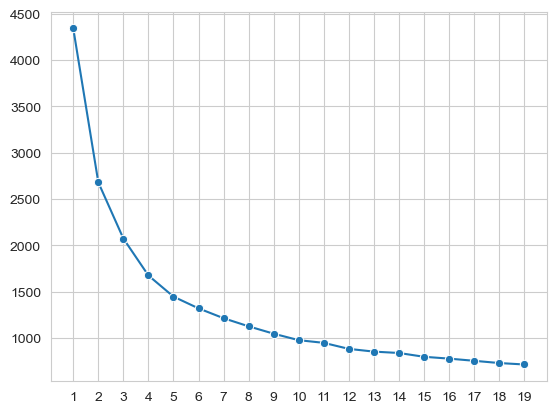

In [112]:
clusters_range = range(1, 20)
inertia = []
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
plot = sns.lineplot(x=clusters_range, y=inertia, marker='o')
plot.set_xticks(clusters_range)
plot

In [113]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_4_clustered_df = clusterize(kmeans)
# plot_clusters_tsne(kmeans_4_clustered_df)
kmeans_4_clustered_df.groupby('labels').mean().T
# assess_feature_importance(kmeans_4_clustered_df)
# kmeans_4_clustered_df.groupby('labels').size()

Silhouette Score: 0.404


labels,0,1,2,3
Income,2461.916178,2438.798229,1359.171288,2790.237203
EnrollmentDurationInDays,176.978689,238.835547,297.576094,904.764045
LastPeriodDurationInDays,181.422838,365.777989,267.577942,238.093633
DaysWithoutFrequency,73.960931,68.383934,86.593962,150.547441
LifetimeValue,161.358212,184.444450,490.255773,664.098333
NumberOfFrequencies,27.398686,30.316888,38.049600,117.406367
AttendedClasses,0.815663,1.064832,32.694085,12.900125
AllowedWeeklyVisitsBySLA,6.984195,6.973435,2.251694,6.782147
AllowedNumberOfVisitsBySLA,44.747755,59.975288,18.768589,50.090206
RealNumberOfVisits,5.719410,5.561354,3.583179,6.831461


<Axes: xlabel='labels'>

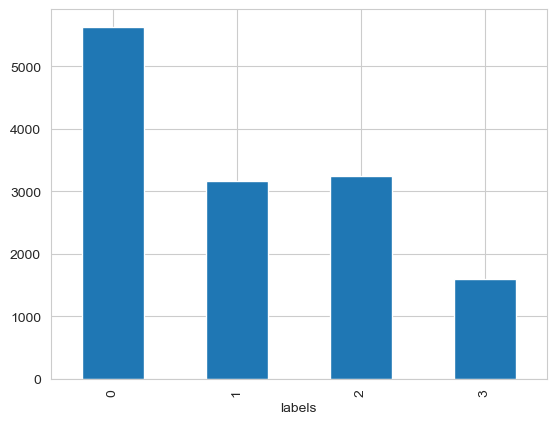

In [114]:
# bar plot size of clusters
kmeans_4_clustered_df.groupby('labels').size().plot(kind='bar')

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


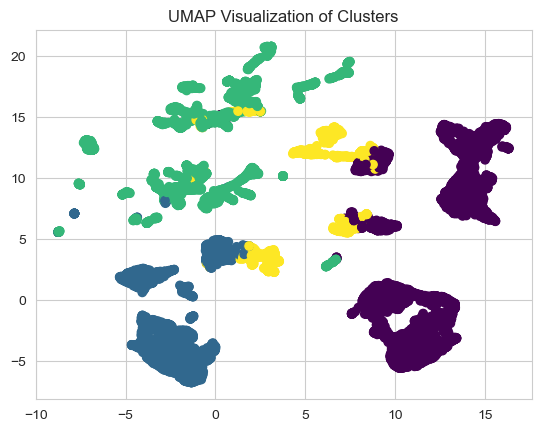

In [126]:
plot_clusters_umap(kmeans_4_clustered_df)

## DBSCAN

In [116]:
dbscan = DBSCAN(eps=0.3, min_samples=50)
dbscan_clustered_df = clusterize(dbscan)

dbscan_clustered_df.groupby('labels').size()

Silhouette Score: 0.271


labels
-1     462
 0    4921
 1    8258
dtype: int64

I've tried to fine tune the parameters of DBSCAN, but in general the algorithm create very unbalanced clusters.

Because of that, I'll stick with K-Means for now.

# Checking results (double check it with ChatGPT later)
## View results
- Check if the cluster center (mean) of any variables doesn't vary much between clusters, if so, we can drop it.
- If there are clusters with too few customers, we can check if the center of the variables is similar to the other clusters, if so, we can merge them.


## Visualization
- We can plot cluster centers:
```python
df.groupby('labels') \ [scaled_features].mean().plot(kind='bar')
```

# Feature reduction
- Factor Analysis
- Multidimensional scaling